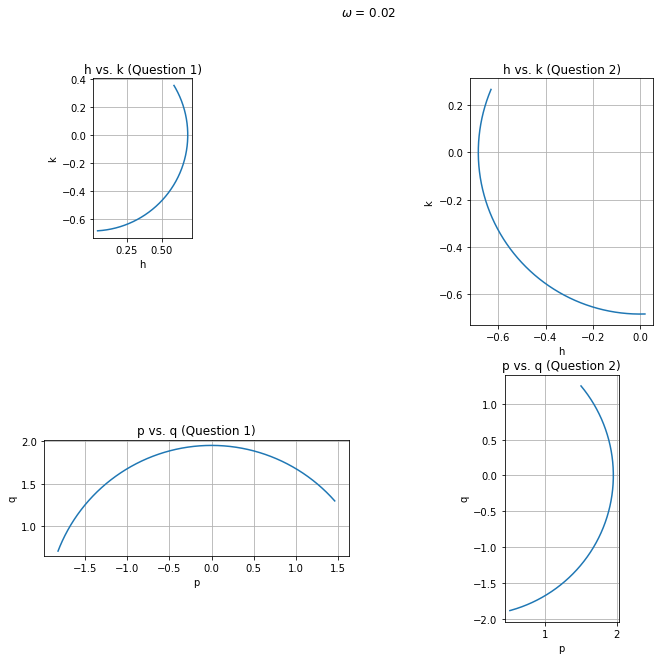

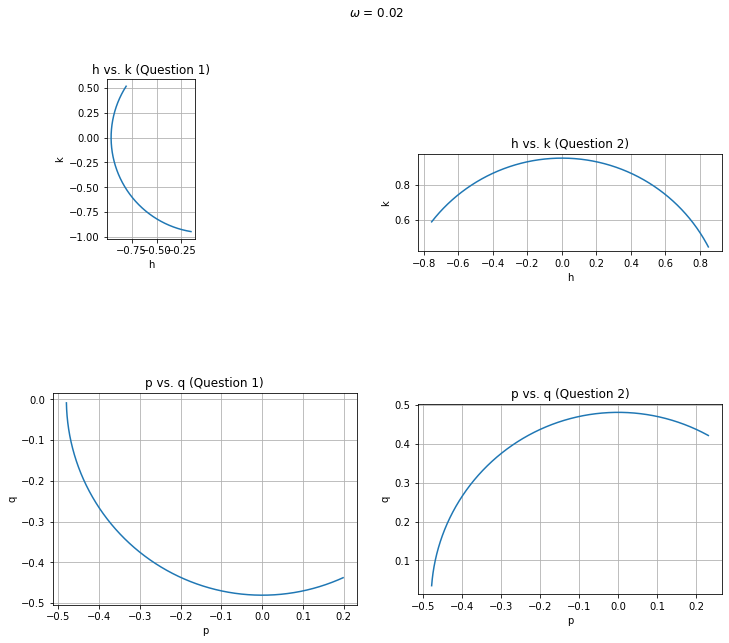

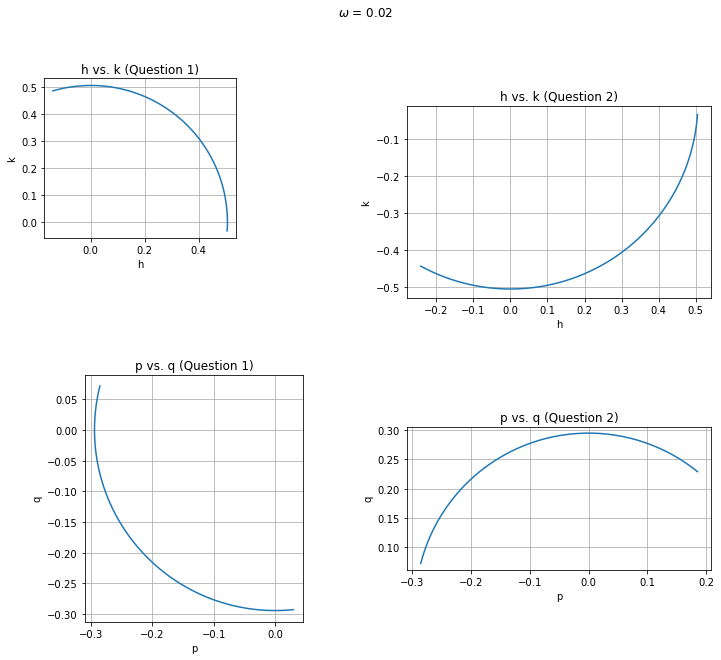

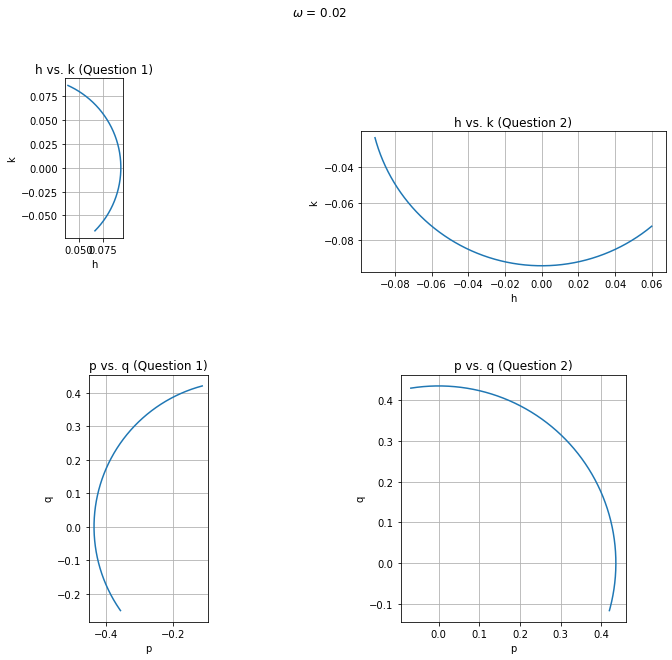

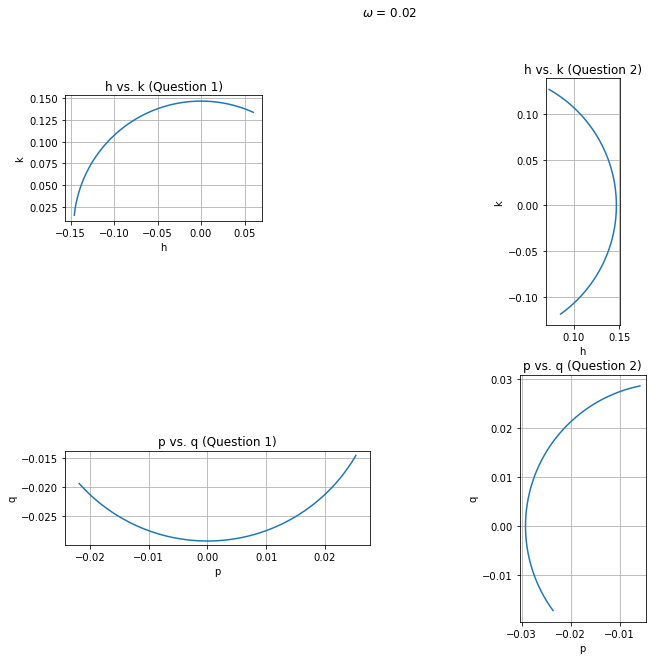

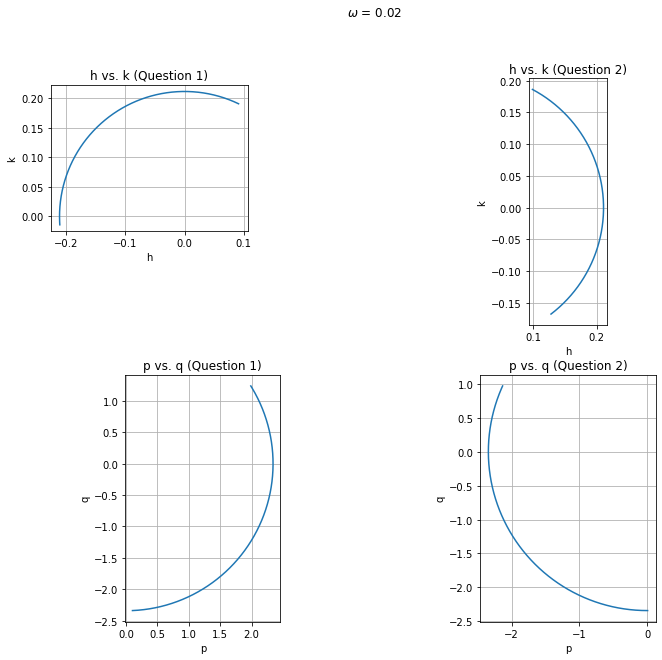

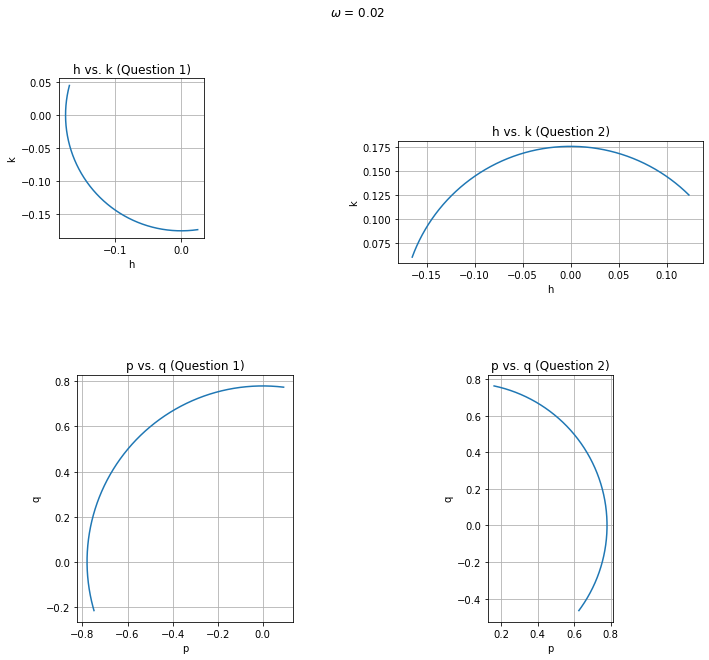

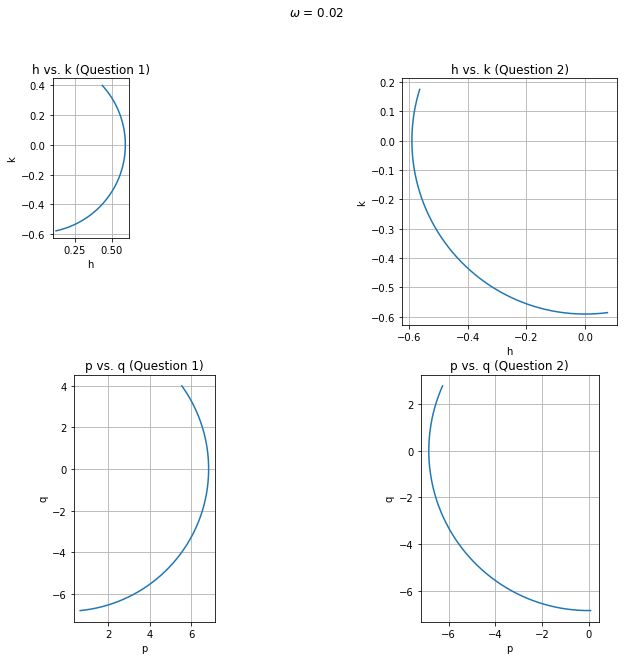

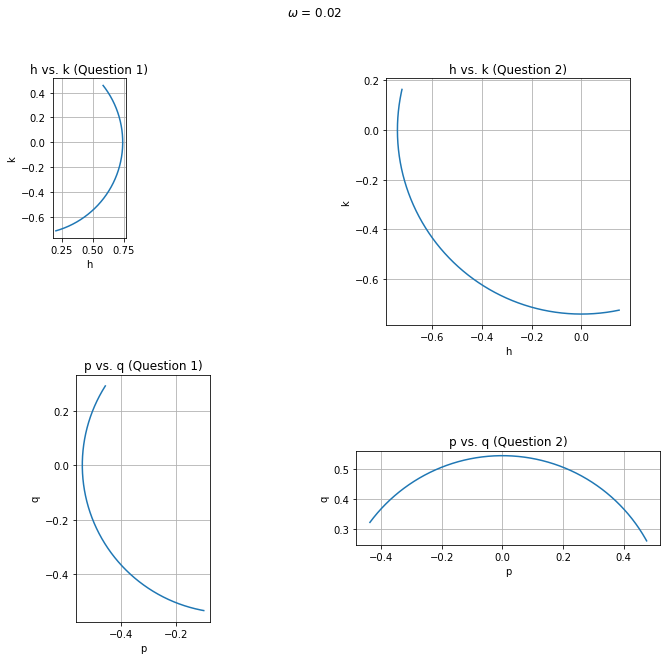

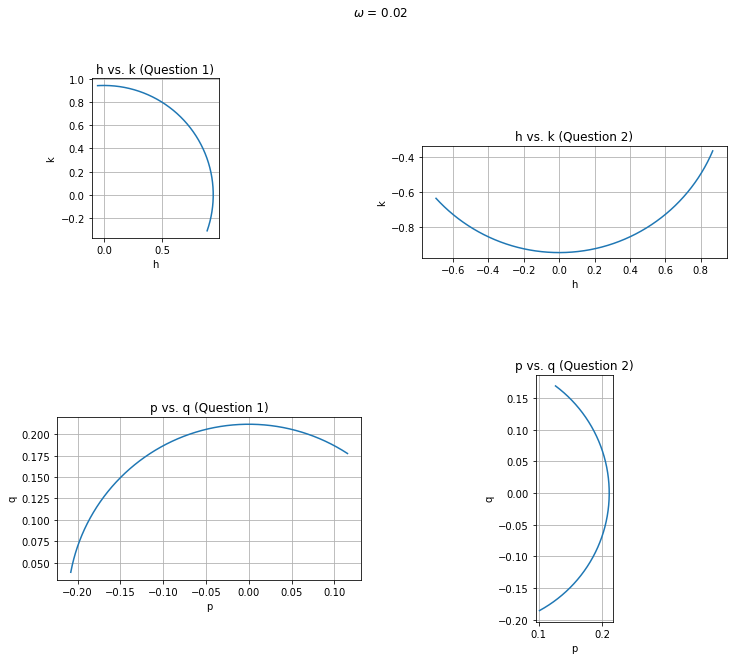

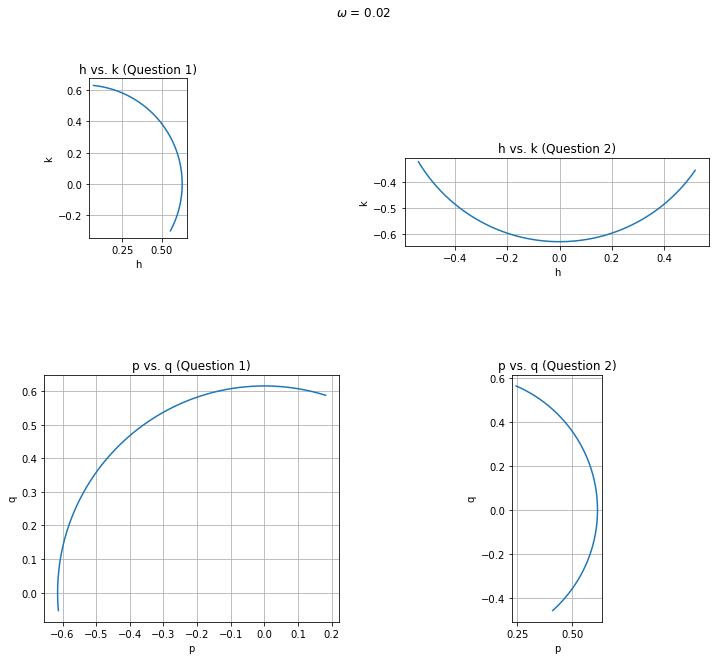

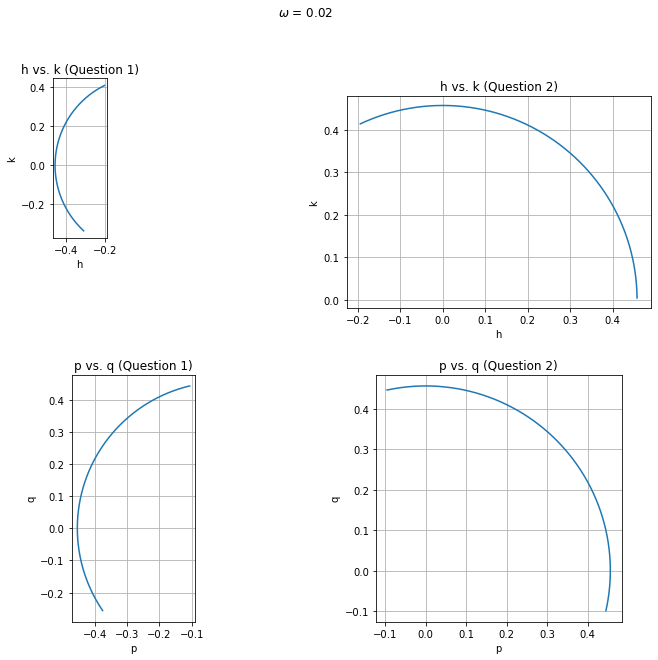

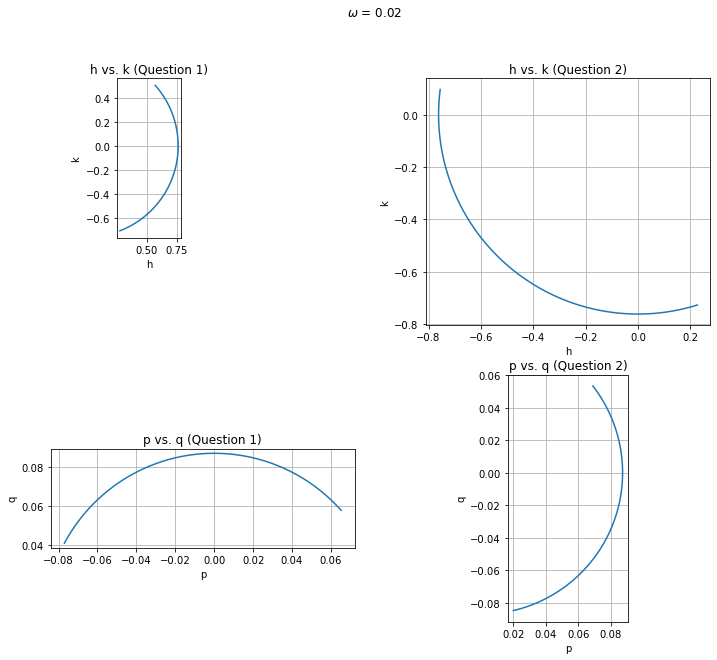

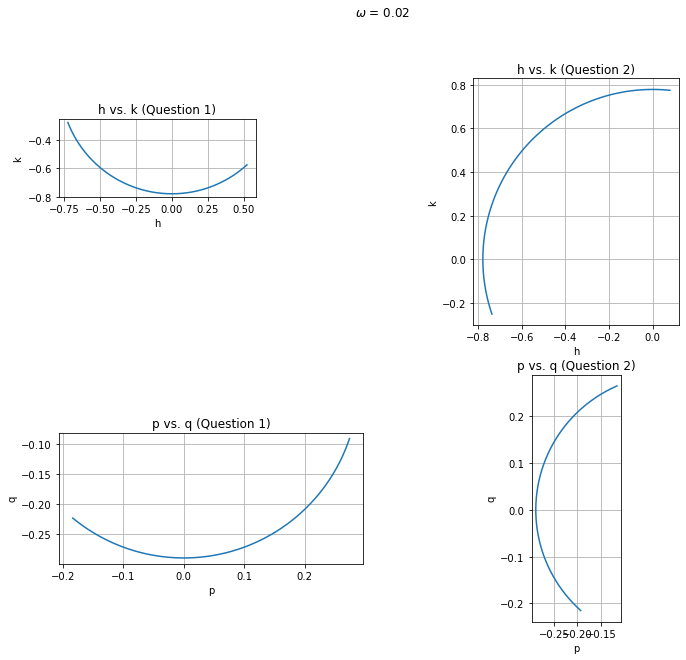

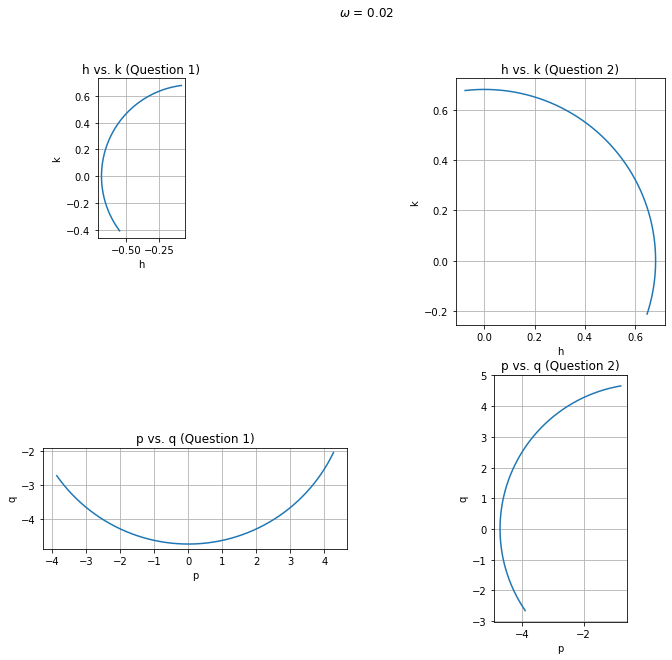

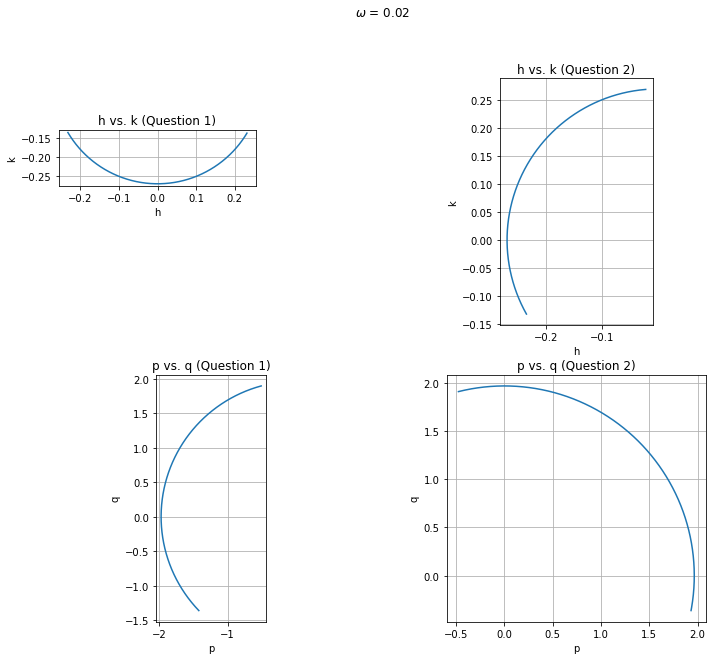

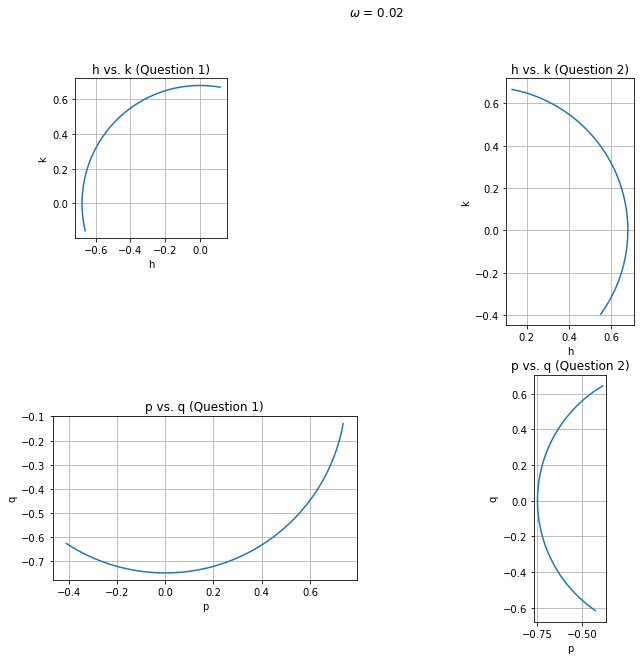

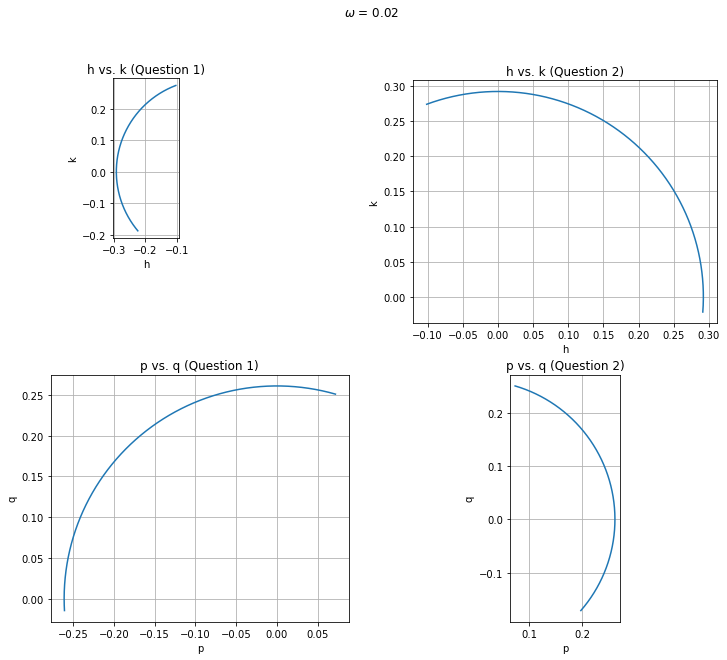

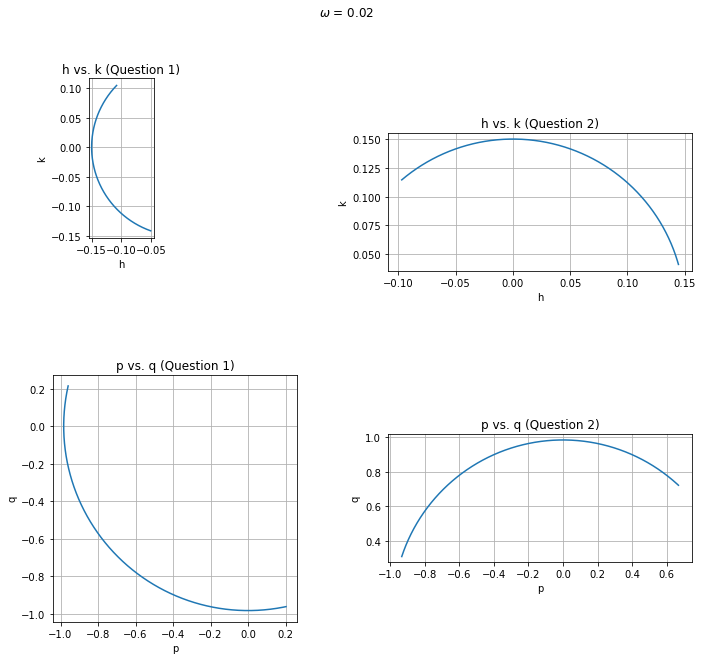

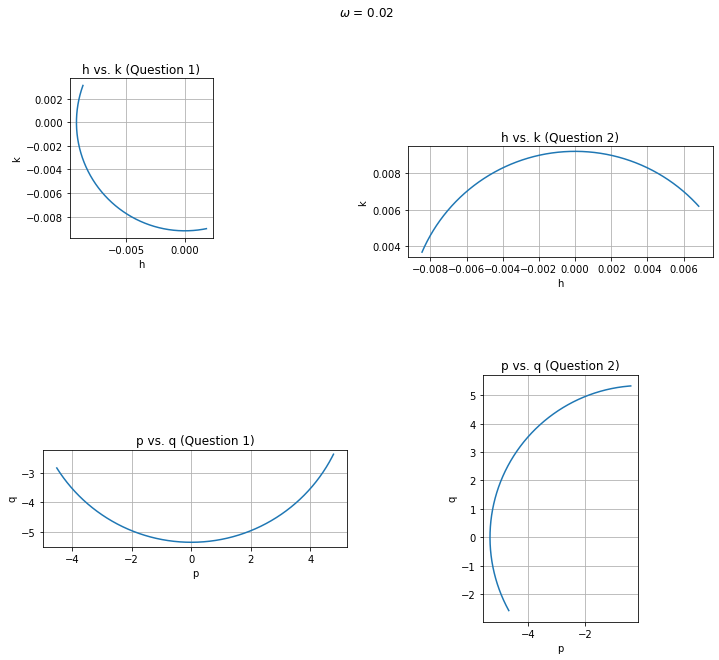

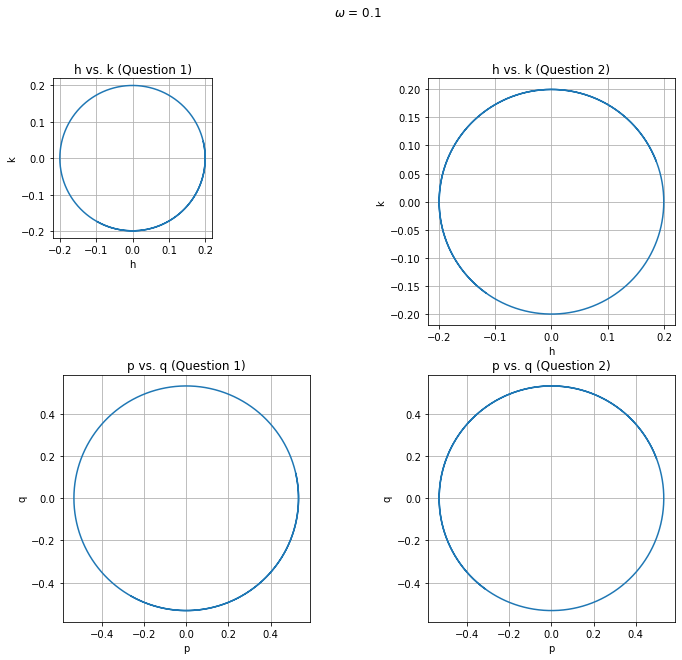

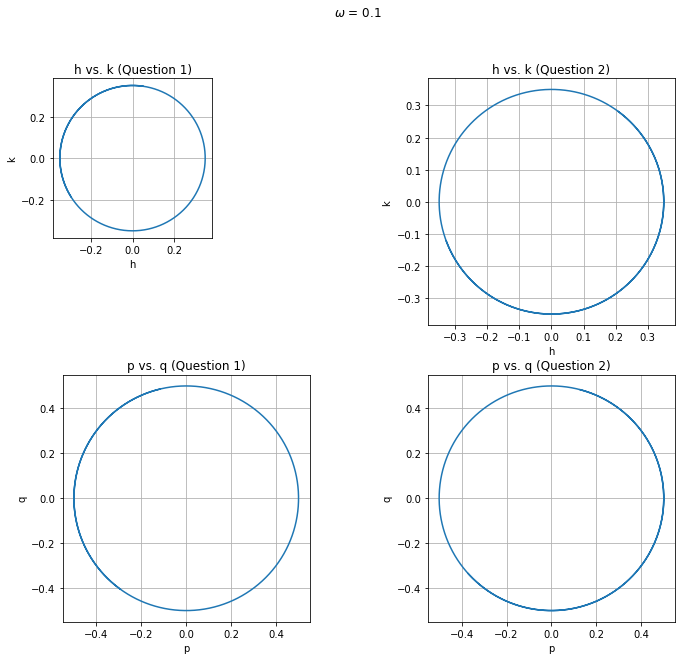

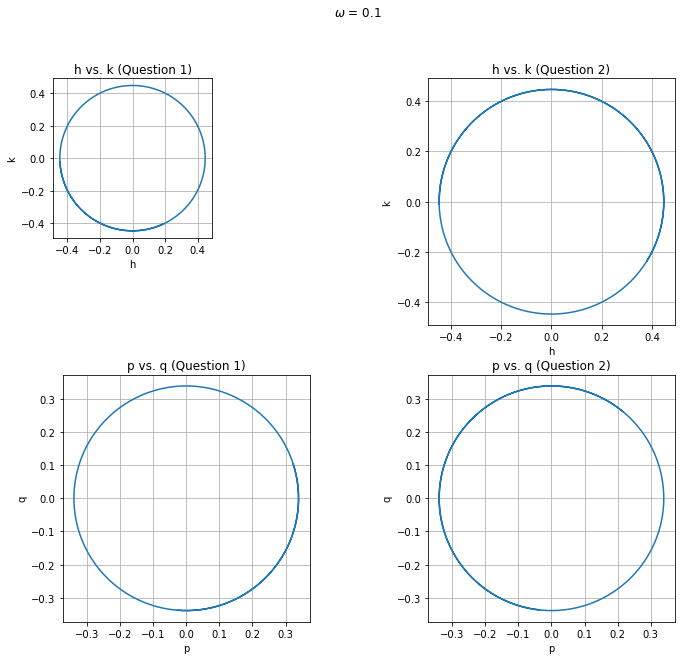

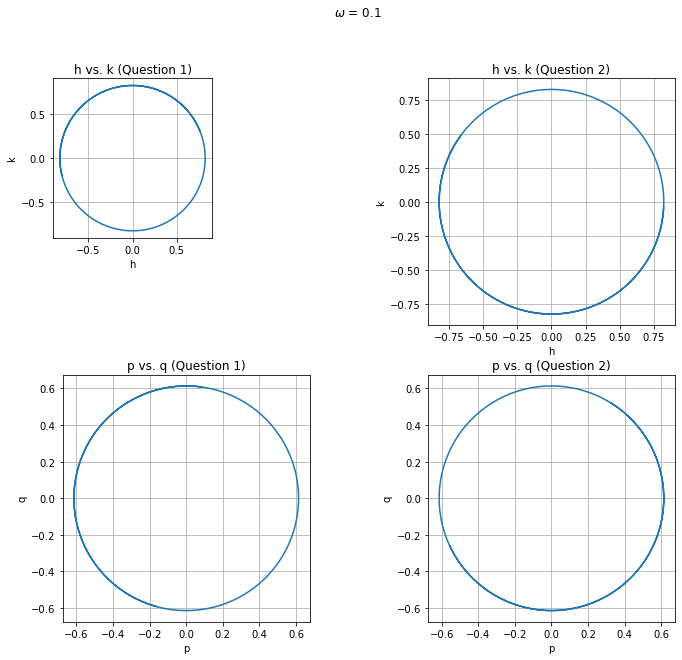

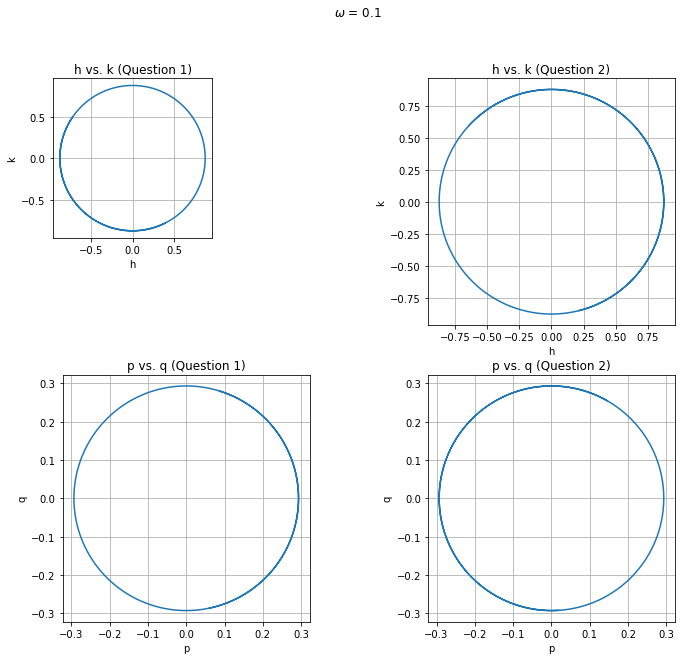

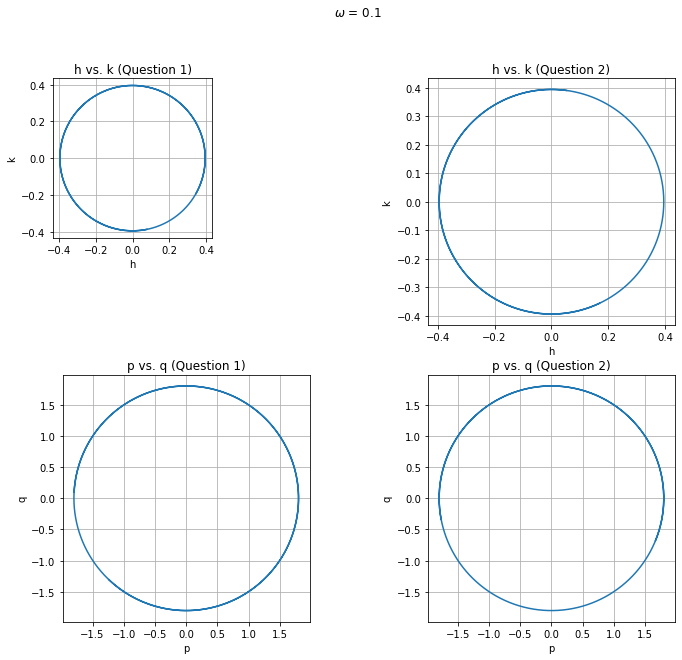

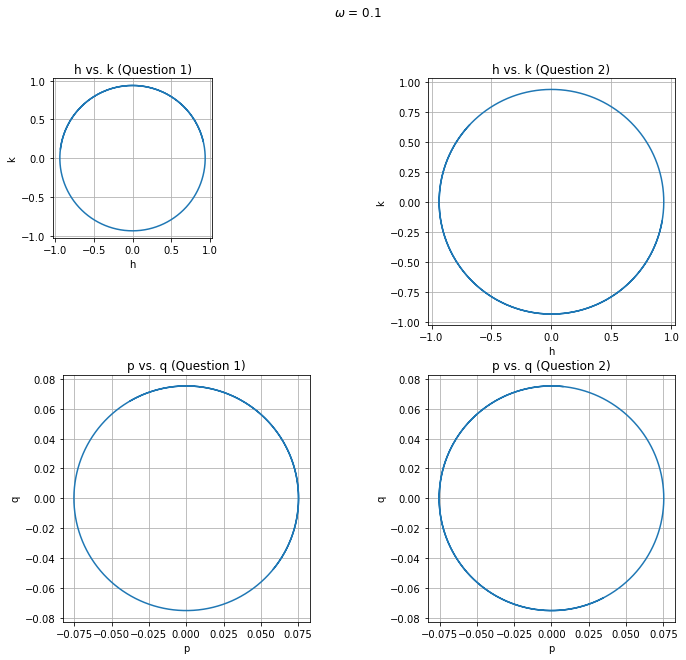

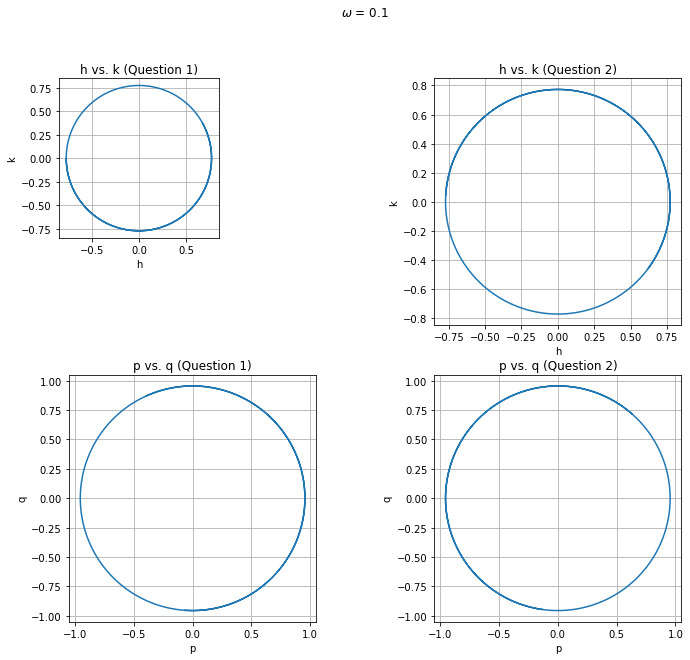

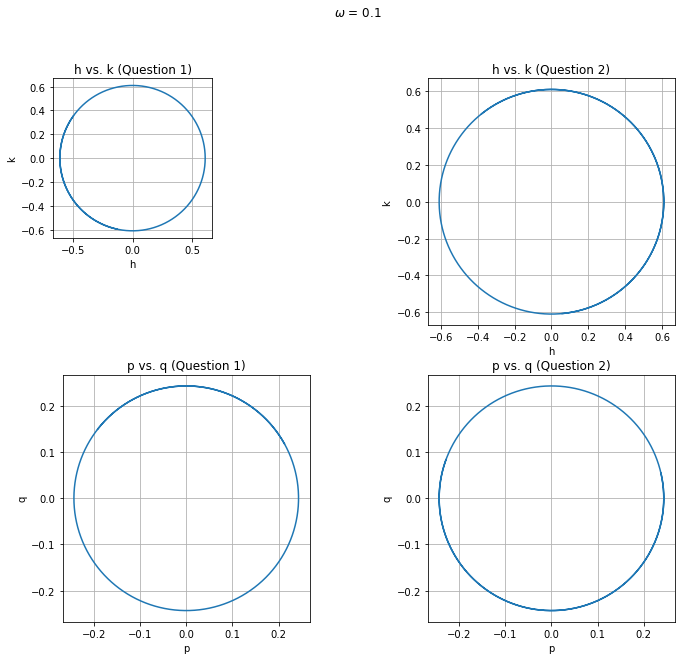

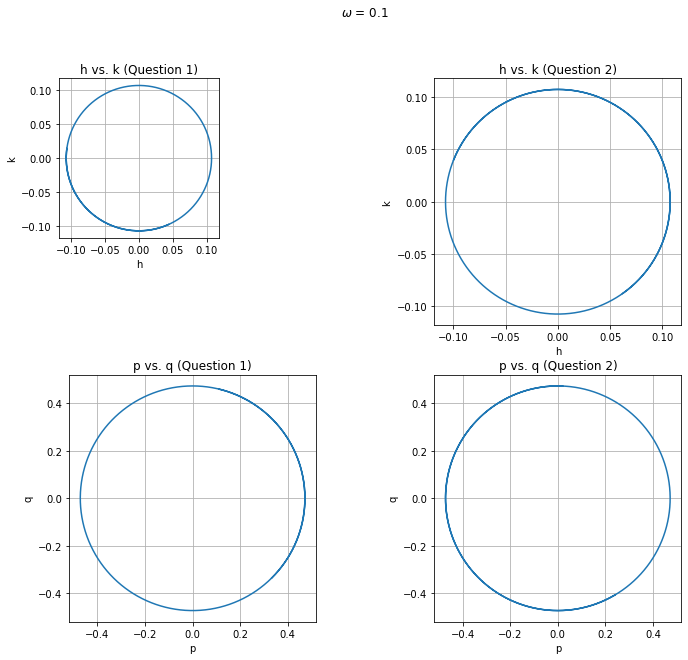

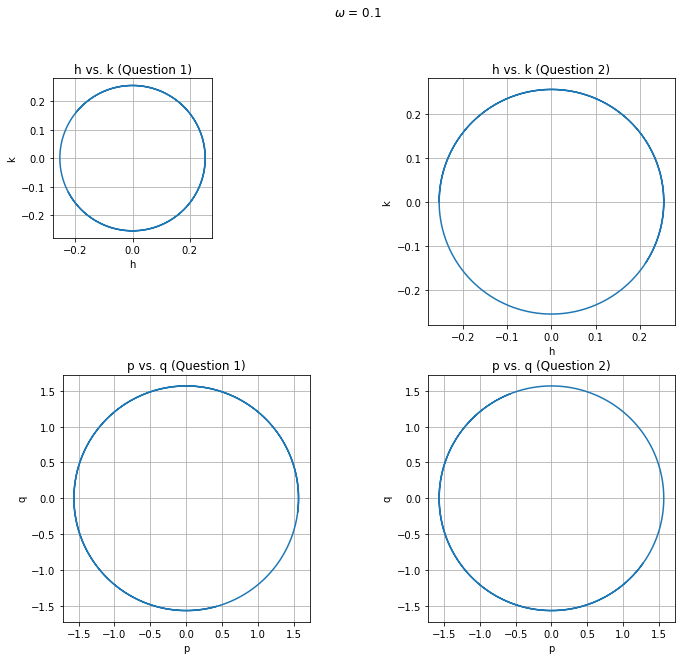

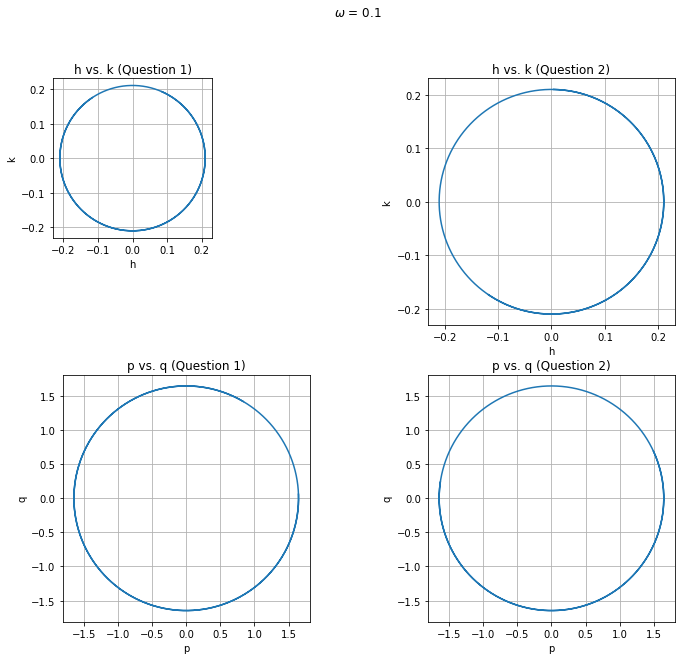

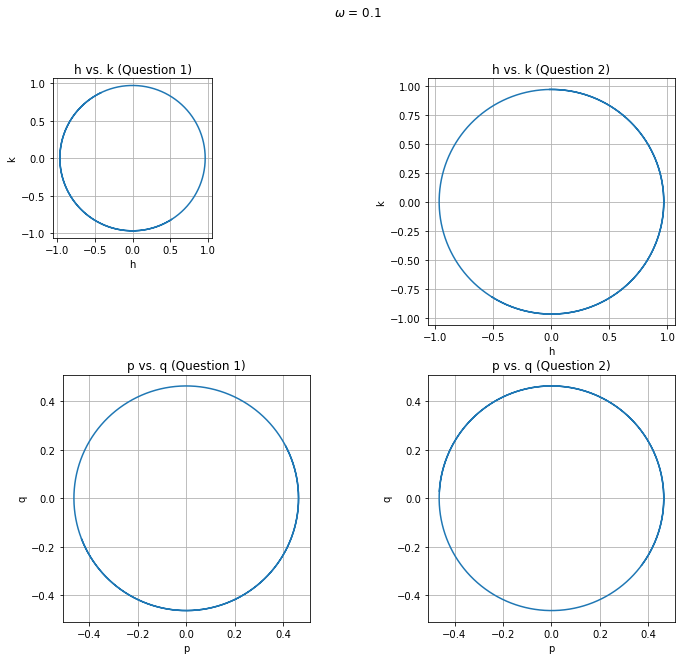

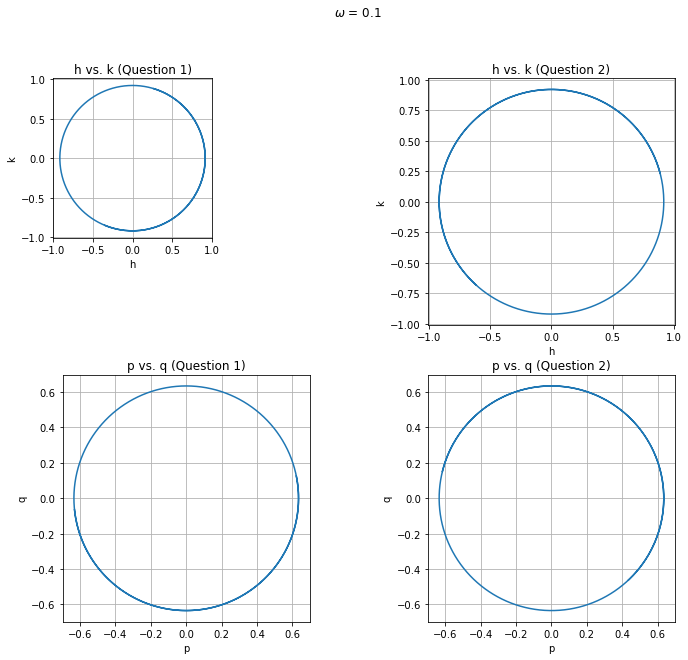

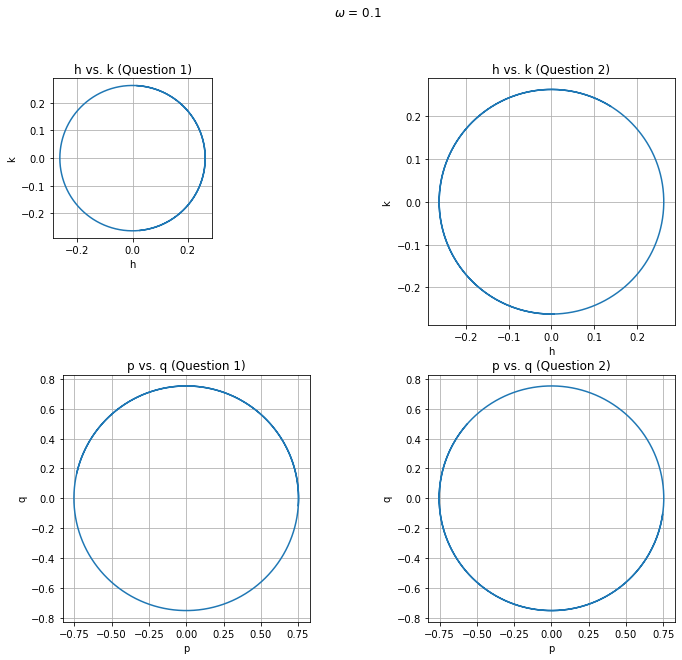

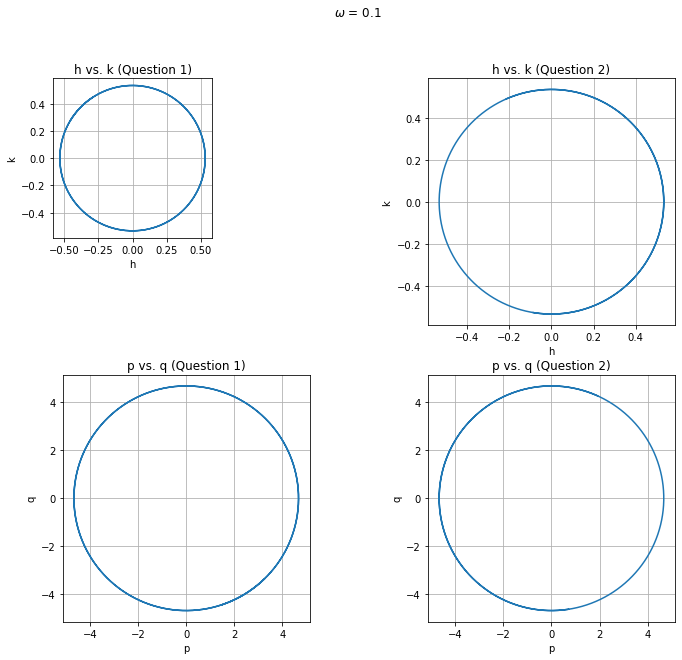

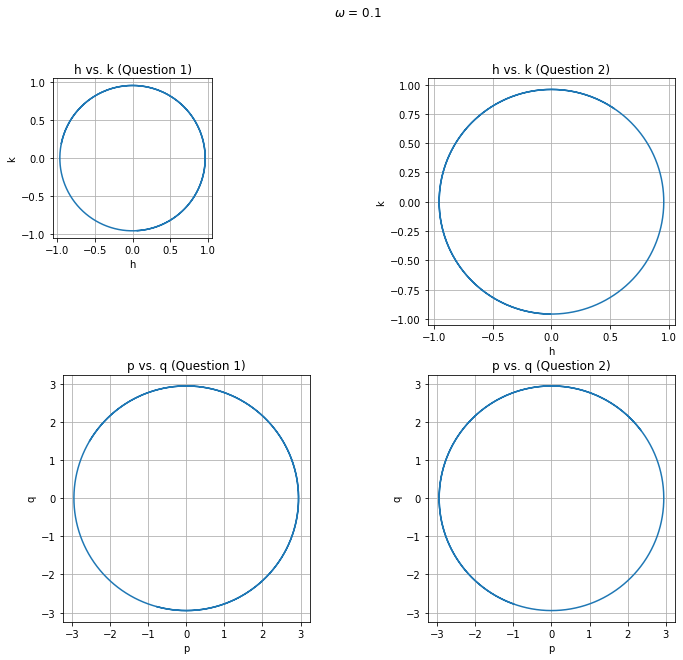

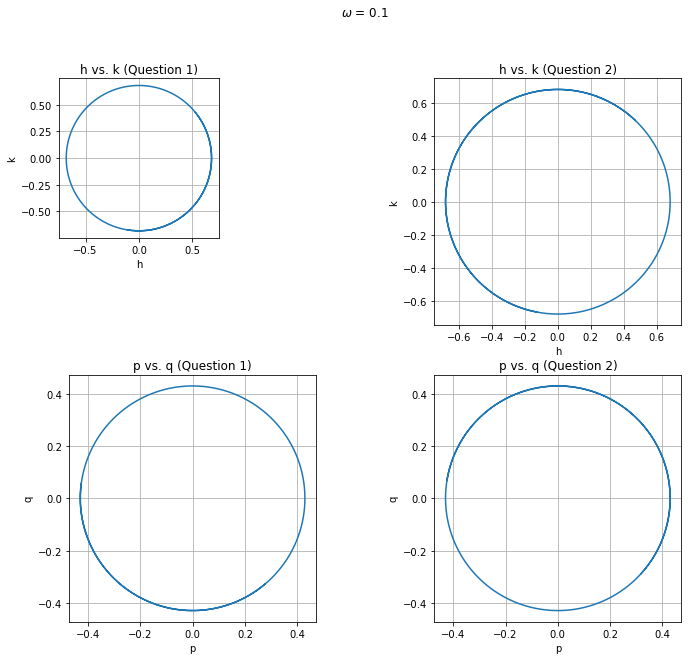

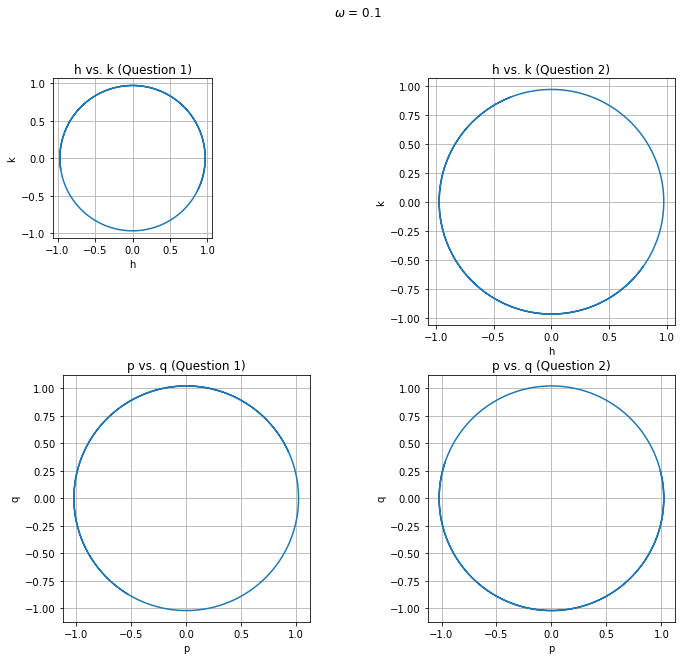

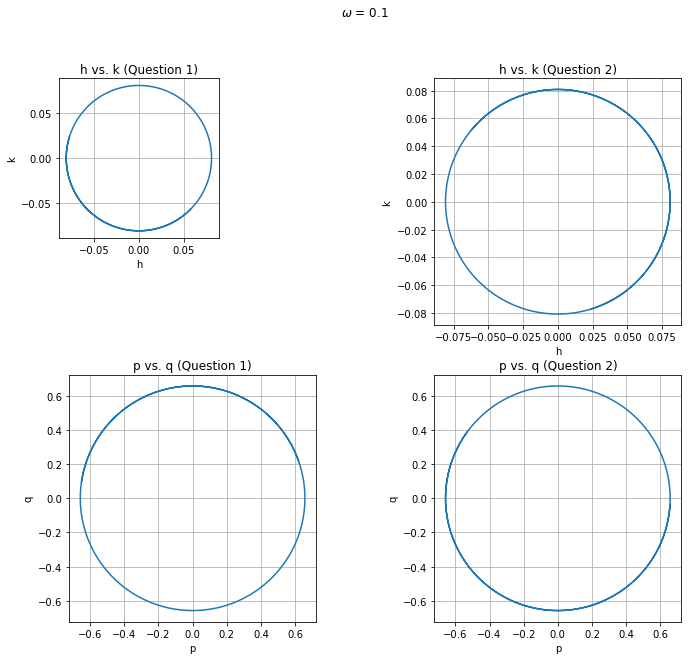

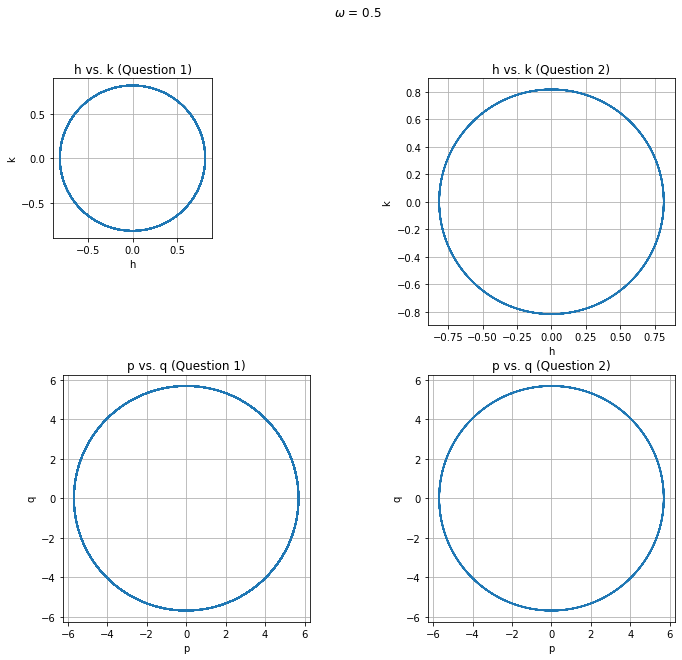

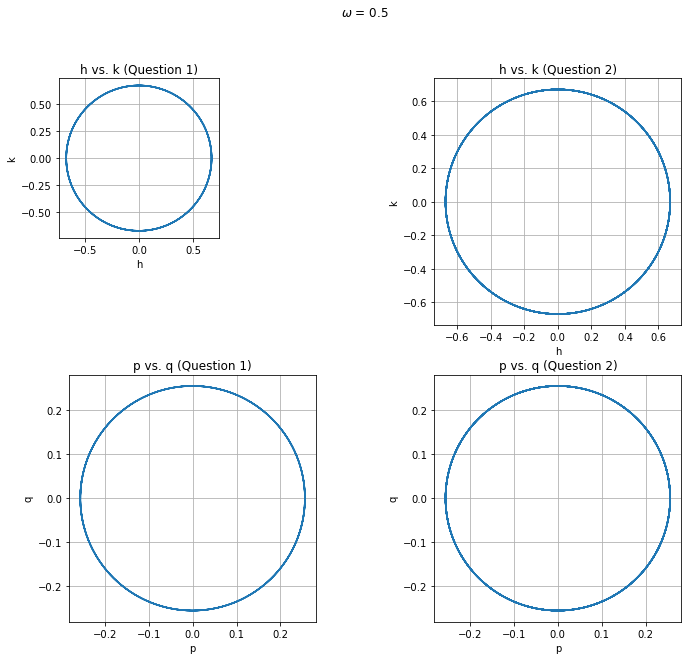

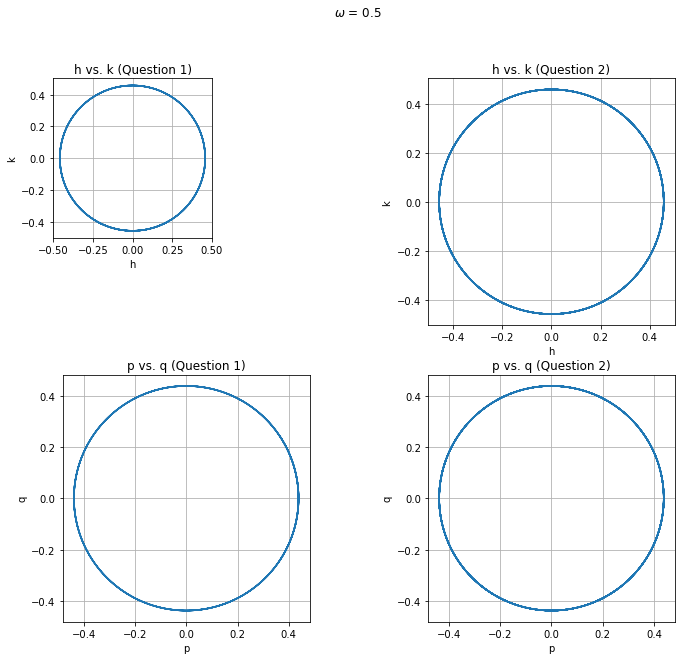

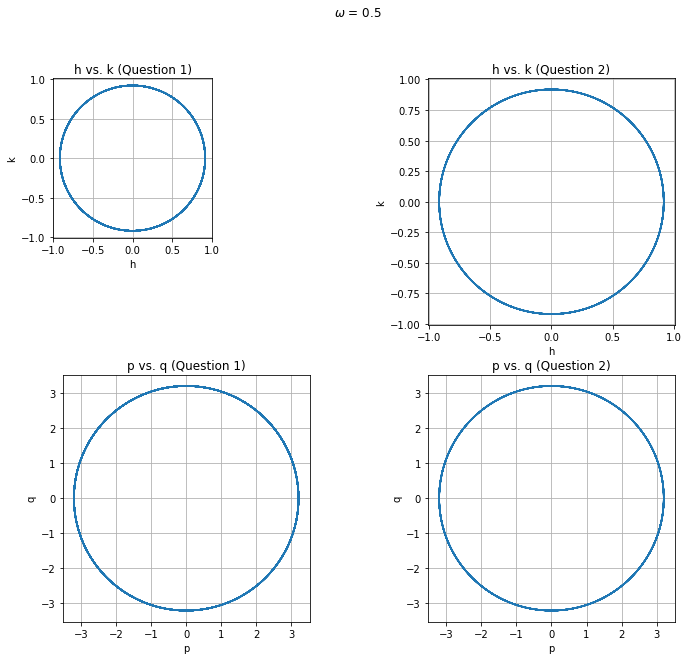

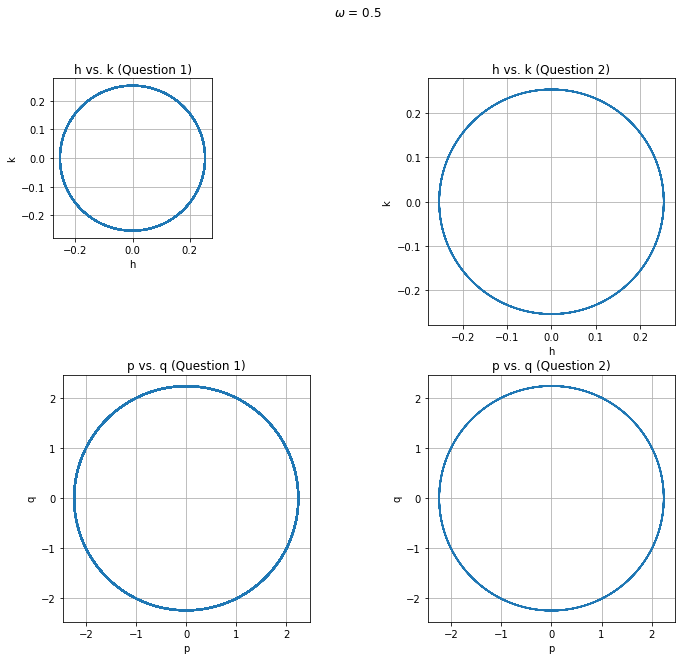

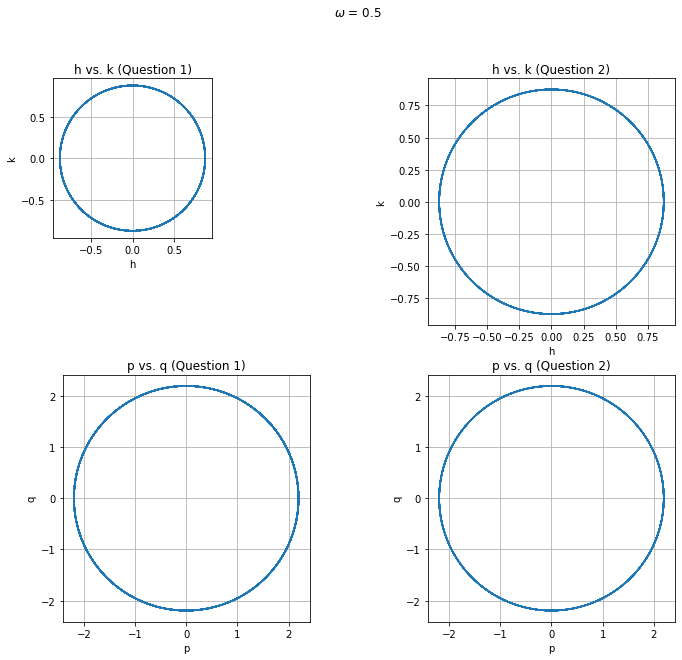

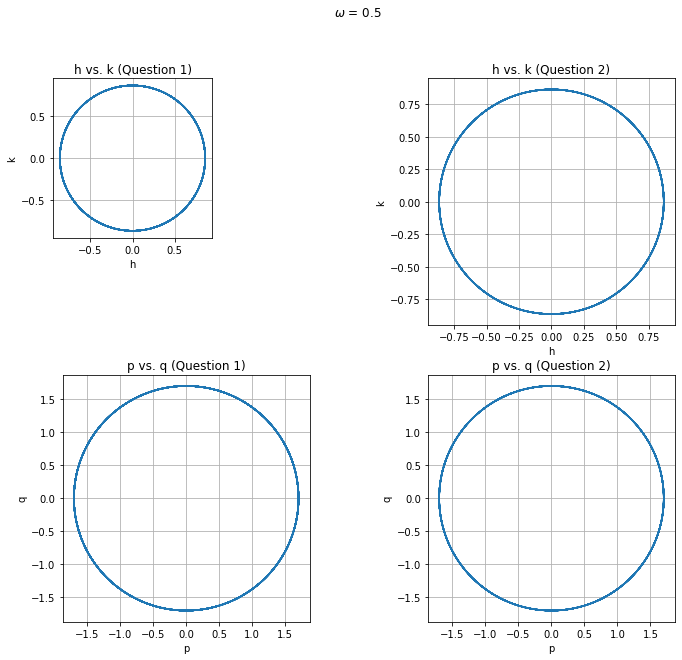

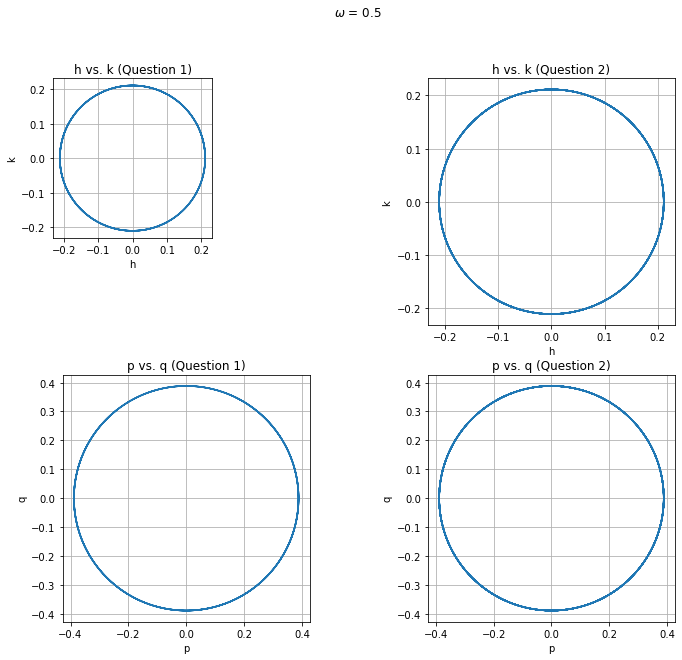

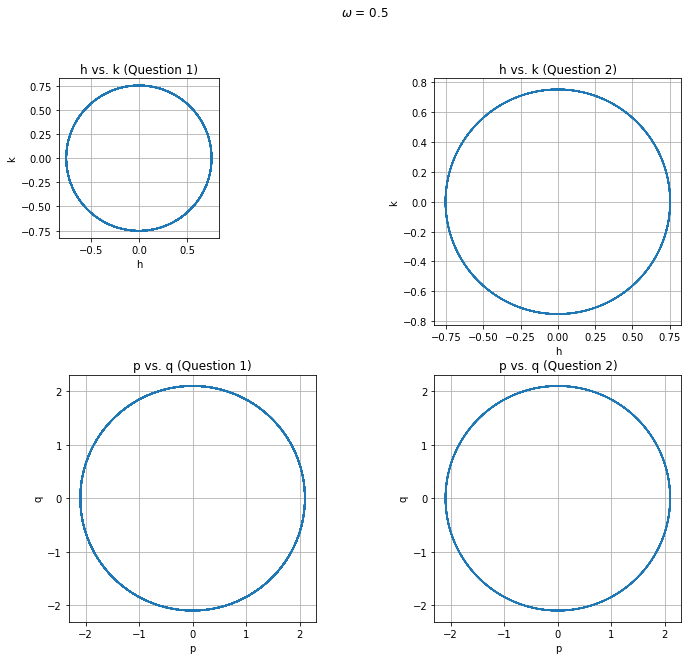

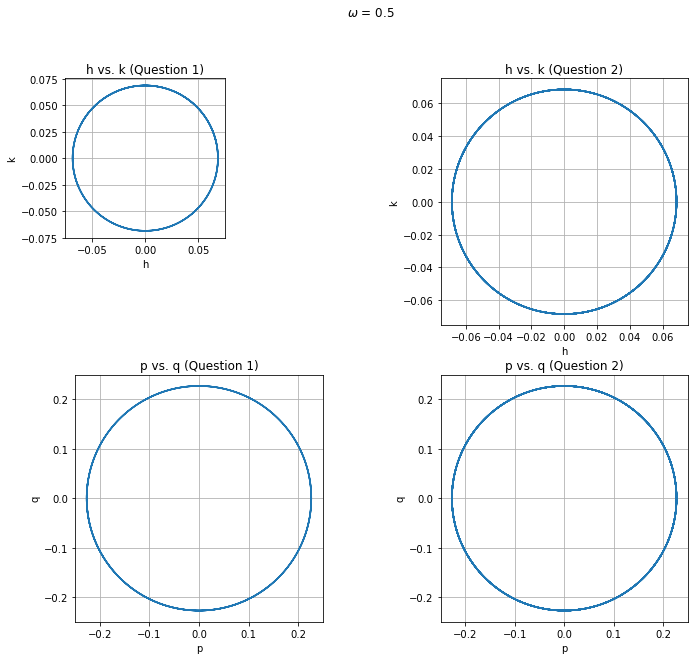

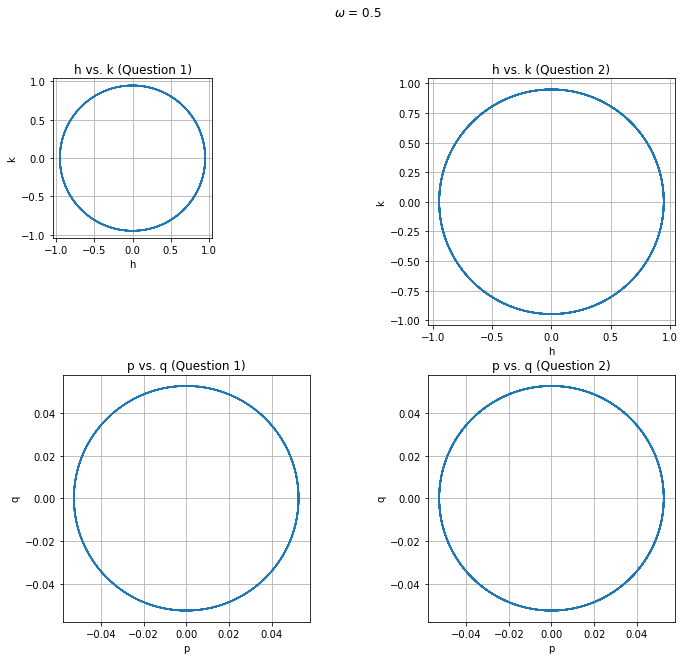

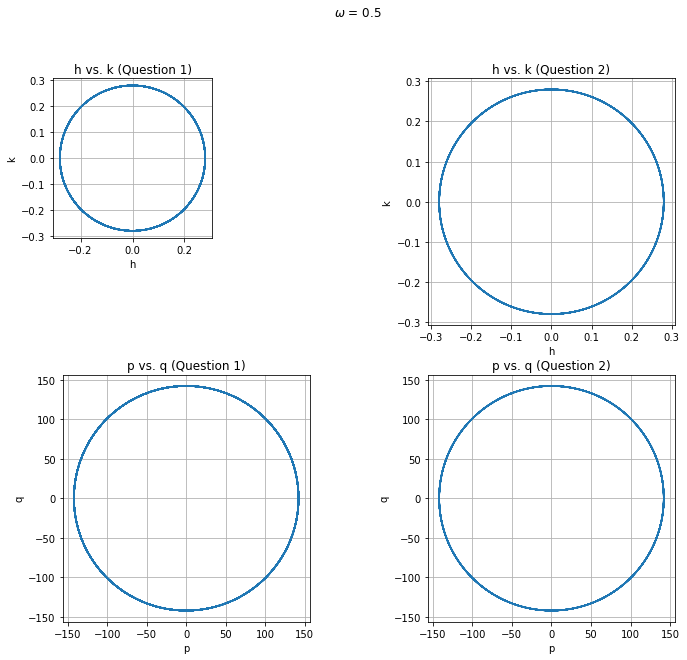

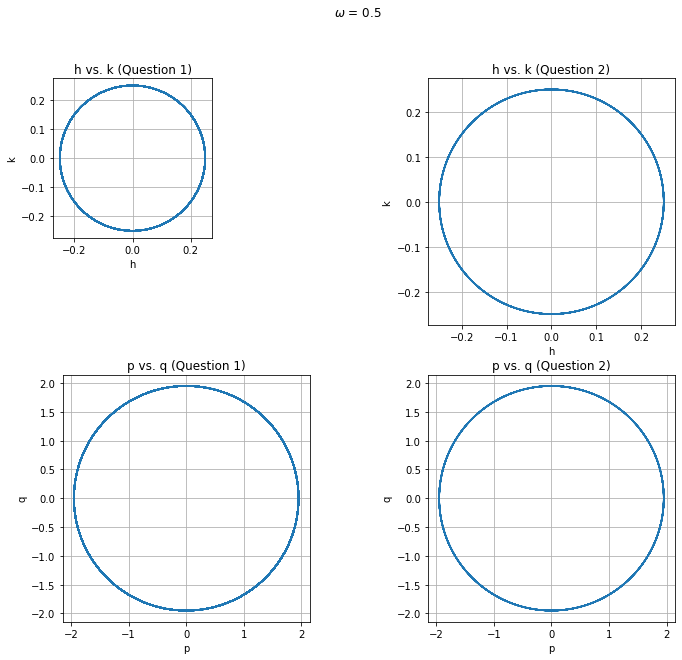

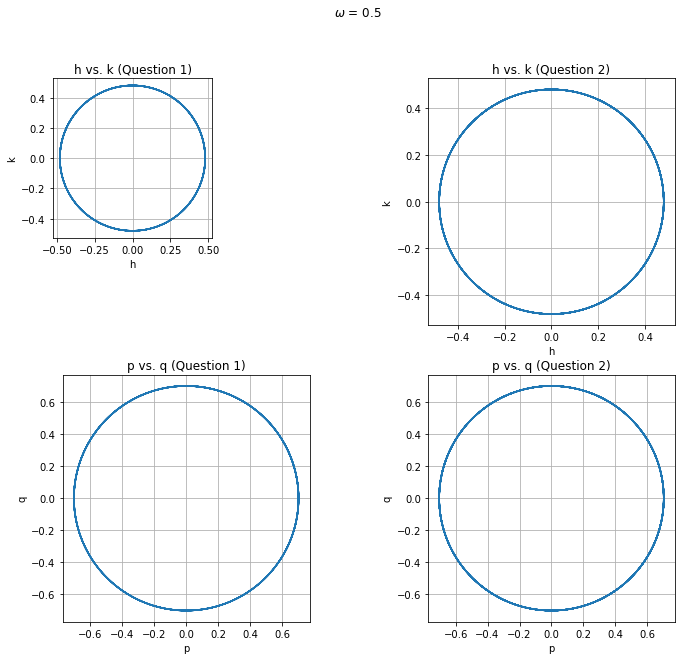

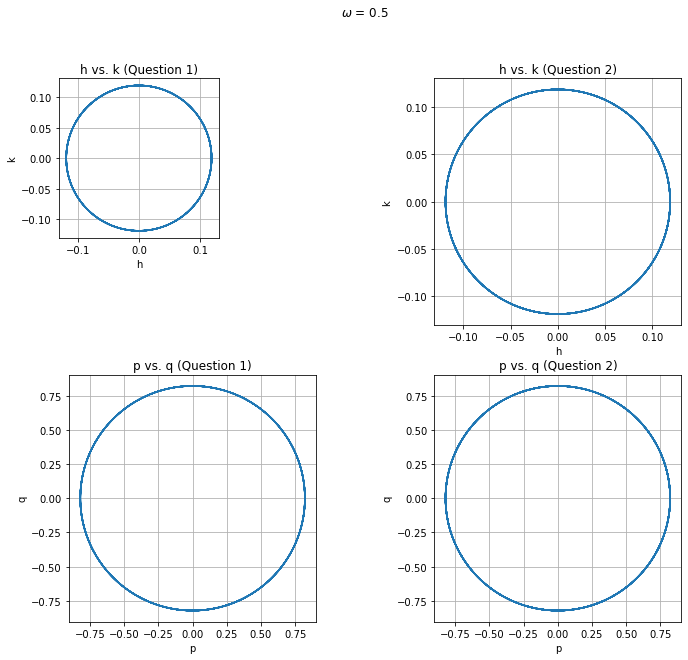

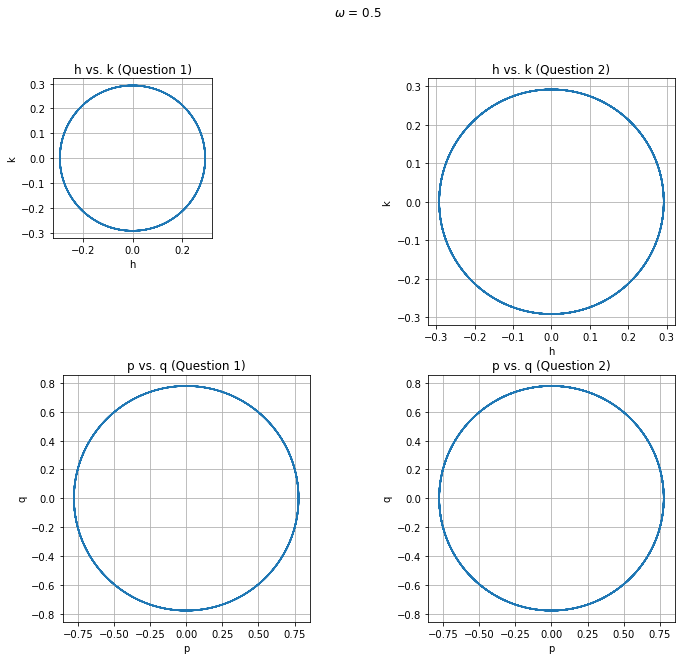

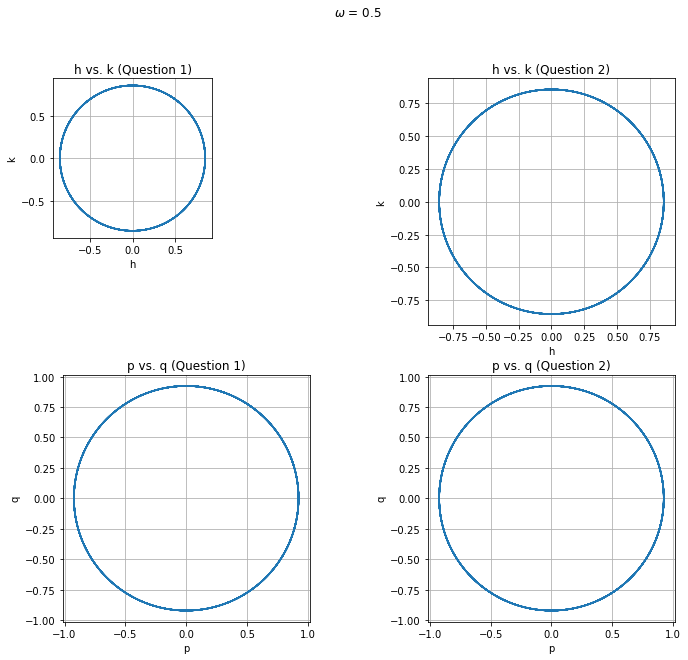

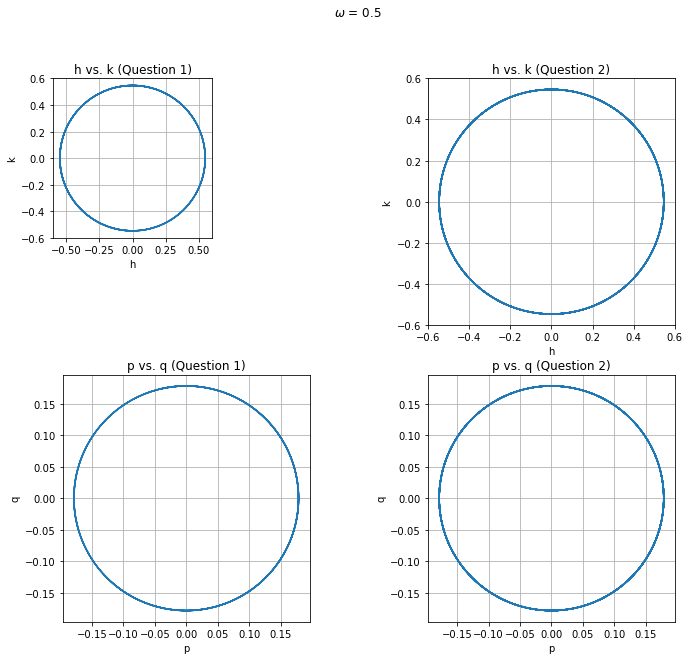

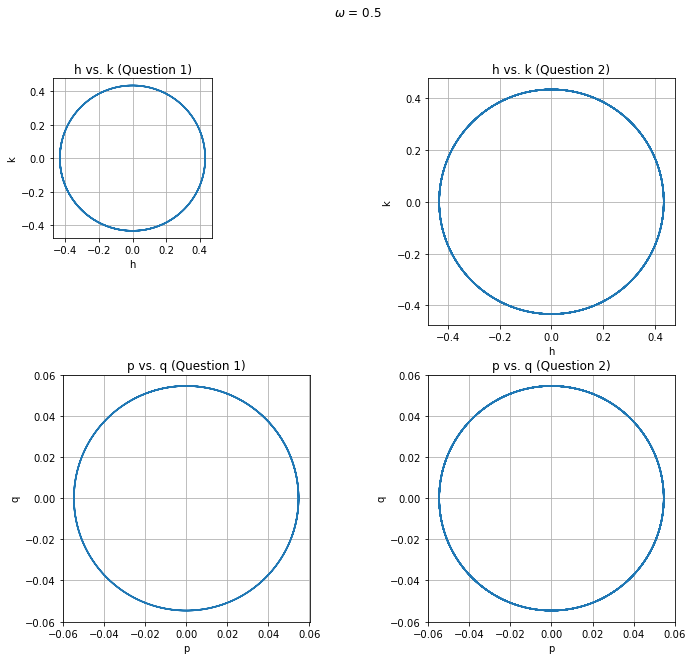

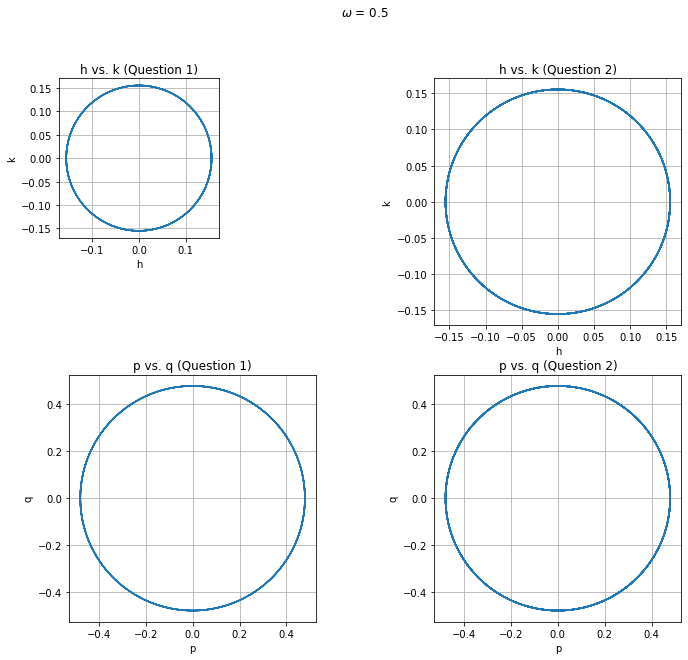

In [1]:
#Kanishka Deepak
#AE 502 - Homework Project 3

#3

import numpy as np
import matplotlib.pyplot as plt

def q1analytic_oe(conds, rot, tspan, steps):
    # initial conditions
    lp0, gp0, hp0, Lp0, Gp0, Hp0 = conds

    # propagate over time
    const_t = np.ones(steps)
    gp = gp0 * const_t
    hp = hp0 * const_t
    Lp = Lp0 * const_t
    Gp = Gp0 * const_t
    Hp = Hp0 * const_t
    lp = 1/(Lp**3) * tspan + lp0

    # convert to original variables
    G3 = Gp
    H3 = Hp
    g3 = gp
    L3 = np.ones(steps)
    l3 = lp/(1 + 3 * rot * L3**2 * H3)
    h3 = hp - rot * L3**3 * l3

    # convert to Keplerian elements
    M_ = l3
    w_ = g3
    RA_ = h3 - g3

    return M_, w_, RA_


def q2analytic_oe(conds, rot, tspan, steps):
    # initial conditions
    l0, g0, h0, L0, G0, H0 = conds

    # propagate over time
    const_t = np.ones(steps)
    g = g0 * const_t
    L = L0 * const_t
    G = G0 * const_t
    H = H0 * const_t
    h = rot * tspan + h0
    l = 1/(L**3) * tspan + l0

    # convert to Keplerian elements
    M_ = l
    w_ = g
    RA_ = h - g

    return M_, w_, RA_


# Useful constants
mu = 1
rotation = 0.01

# (Q2)
a = 1  # DU
e = 0.5
inc = 45  # deg
duration = 100  # TU

# choose number of steps
steps = 10000

# calculate useful parameters
n = np.sqrt(mu/a**3)

# calculate initial Delaunay variables
L = n*a**2
G = L*(1 - e**2)**(1/2)
H = G*np.cos(inc*np.pi/180)

# propagate orbit
state0 = np.array([0., 0., 0., L, G, H])
tspan = np.linspace(0, duration, steps)


# iterate through different perturbation values
rotvals = [0.02, 0.1, 0.5]  # 1/TU
for ii in range(len(rotvals)):
    perturb = rotvals[ii]

    # iterate through different initial conditions
    for jj in range(20):
        # vary e and i
        inc_var = np.random.rand() * 2 * np.pi  # between 0 and 2pi
        e_var = np.random.rand()  # between 0 and 1

        # calculate varied l,g,h,G,H
        l_var = np.random.rand() * 2 * np.pi
        g_var = np.random.rand() * 2 * np.pi
        h_var = np.random.rand() * 2 * np.pi
        G_var = L * (1 - e_var ** 2) ** (1 / 2)
        H_var = G_var * np.cos(inc_var)

        # define initial conditions
        init_conds = np.array([l_var, g_var, h_var, L, G_var, H_var])

        # find q1 vals
        M1, w1, RA1 = q1analytic_oe(init_conds, perturb, tspan, steps)
        h1 = e_var * np.sin(w1 + RA1)
        k1 = e_var * np.cos(w1 + RA1)
        p1 = np.tan(inc_var / 2) * np.sin(RA1)
        q1 = np.tan(inc_var / 2) * np.cos(RA1)

        # find q2 vals
        M2, w2, RA2 = q2analytic_oe(init_conds, perturb, tspan, steps)
        h2 = e_var * np.sin(w2 + RA2)
        k2 = e_var * np.cos(w2 + RA2)
        p2 = np.tan(inc_var / 2) * np.sin(RA2)
        q2 = np.tan(inc_var / 2) * np.cos(RA2)

        # create plots
        fig = plt.figure(ii + 2 , figsize=(12, 10))
        if ii == 0:
            fig.suptitle(r"$\omega$ = 0.02")
        elif ii == 1:
            fig.suptitle(r"$\omega$ = 0.1")
        else:
            fig.suptitle(r"$\omega$ = 0.5")

        ax1 = fig.add_subplot(3, 3, 1)
        ax1.set_aspect("equal")
        ax1.set_xlabel("h")
        ax1.set_ylabel("k")
        ax1.set_title("h vs. k (Question 1)")
        ax1.grid(True)
        ax1.plot(h1, k1)

        ax2 = fig.add_subplot(2, 2, 2)
        ax2.set_aspect("equal")
        ax2.set_xlabel("h")
        ax2.set_ylabel("k")
        ax2.set_title("h vs. k (Question 2)")
        ax2.grid(True)
        ax2.plot(h2, k2)

        ax3 = fig.add_subplot(2, 2, 3)
        ax3.set_aspect("equal")
        ax3.set_xlabel("p")
        ax3.set_ylabel("q")
        ax3.set_title("p vs. q (Question 1)")
        ax3.grid(True)
        ax3.plot(p1, q1)
        
        ax4 = fig.add_subplot(2, 2, 4)
        ax4.set_aspect("equal")
        ax4.set_xlabel("p")
        ax4.set_ylabel("q")
        ax4.set_title("p vs. q (Question 2)")
        ax4.grid(True)
        ax4.plot(p2, q2)
        plt.pause(0.1)
        

plt.show()